In [30]:
# Download the data from Kaggle and unzip it
import opendatasets as od
datasetURL = "https://www.kaggle.com/datasets/gpiosenka/100-bird-species/data"
od.download(datasetURL)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species


100%|██████████| 1.96G/1.96G [02:32<00:00, 13.7MB/s]


In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import warnings

In [53]:
# Function to get image dimensions
def get_image_dimensions(file_path):
    with Image.open(file_path) as img:
        return img.size

In [54]:
from pathlib import Path
data_dir = Path('100-bird-species')

In [55]:
# Collect data about the images
data = []
# for class_name in os.listdir(data_dir):
#     class_dir = os.path.join(data_dir, class_name)
#     if os.path.isdir(class_dir):
#         for image_name in os.listdir(class_dir):
#             image_path = os.path.join(class_dir, image_name)
#             width, height = get_image_dimensions(image_path)
#             size = os.path.getsize(image_path)
#             data.append({
#                 'class': class_name,
#                 'filename': image_name,
#                 'width': width,
#                 'height': height,
#                 'size': size
#             })
            
            
# Collect data about the images (splited into train, test, val)
data = []
for split in ['train', 'test', 'valid']:
    split_dir = os.path.join(data_dir, split)
    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                width, height = get_image_dimensions(image_path)
                size = os.path.getsize(image_path)
                data.append({
                    'split': split,
                    'class': class_name,
                    'filename': image_name,
                    'width': width,
                    'height': height,
                    'size': size
                })

In [56]:
# Create a DataFrame
df = pd.DataFrame(data)
df

,split,class,filename,width,height,size
0,train,CREAM COLORED WOODPECKER,016.jpg,224,224,21526
1,train,CREAM COLORED WOODPECKER,002.jpg,224,224,25777
2,train,CREAM COLORED WOODPECKER,003.jpg,224,224,34935
3,train,CREAM COLORED WOODPECKER,017.jpg,224,224,29610
4,train,CREAM COLORED WOODPECKER,029.jpg,224,224,28112
...,...,...,...,...,...,...
89880,valid,GILA WOODPECKER,4.jpg,224,224,30369
89881,valid,GILA WOODPECKER,5.jpg,224,224,25339
89882,valid,GILA WOODPECKER,2.jpg,224,224,23913
89883,valid,GILA WOODPECKER,3.jpg,224,224,21260


In [57]:
# Basic dataset information
print("Dataset Overview:")
print(f"Total number of images: {len(df)}")
print(f"Number of classes: {df['class'].nunique()}")
print("\nClass distribution:")
print(df['class'].value_counts())

Dataset Overview:
Total number of images: 89885
Number of classes: 526

Class distribution:
class
RUFOUS TREPE               273
HOUSE FINCH                258
OVENBIRD                   243
D-ARNAUDS BARBET           243
ASIAN GREEN BEE EATER      230
                          ... 
RED TAILED THRUSH          140
NORTHERN RED BISHOP        140
PATAGONIAN SIERRA FINCH    140
SNOWY PLOVER               140
PARAKETT AUKLET              5
Name: count, Length: 526, dtype: int64


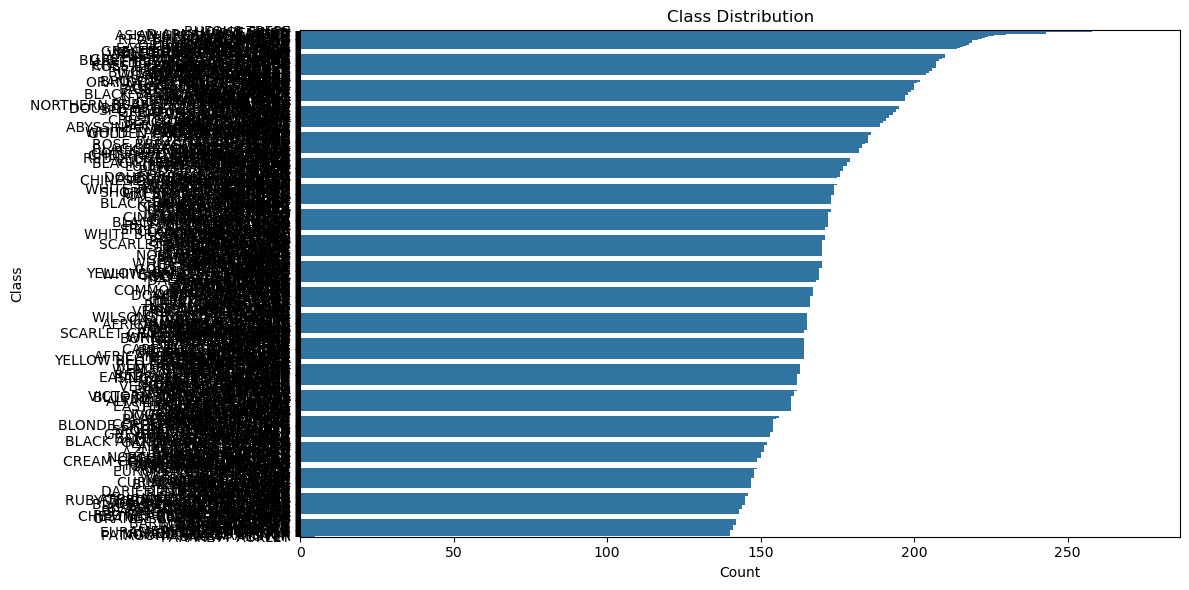

In [45]:
# Visualize class distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='class', data=df, order=df['class'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

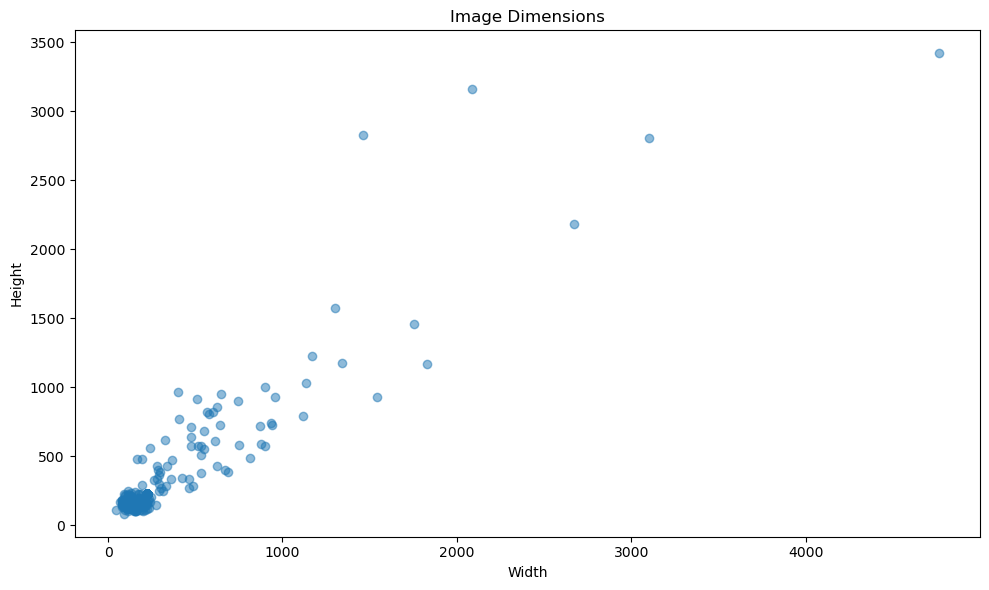

In [46]:
# Image dimensions analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['width'], df['height'], alpha=0.5)
plt.title('Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

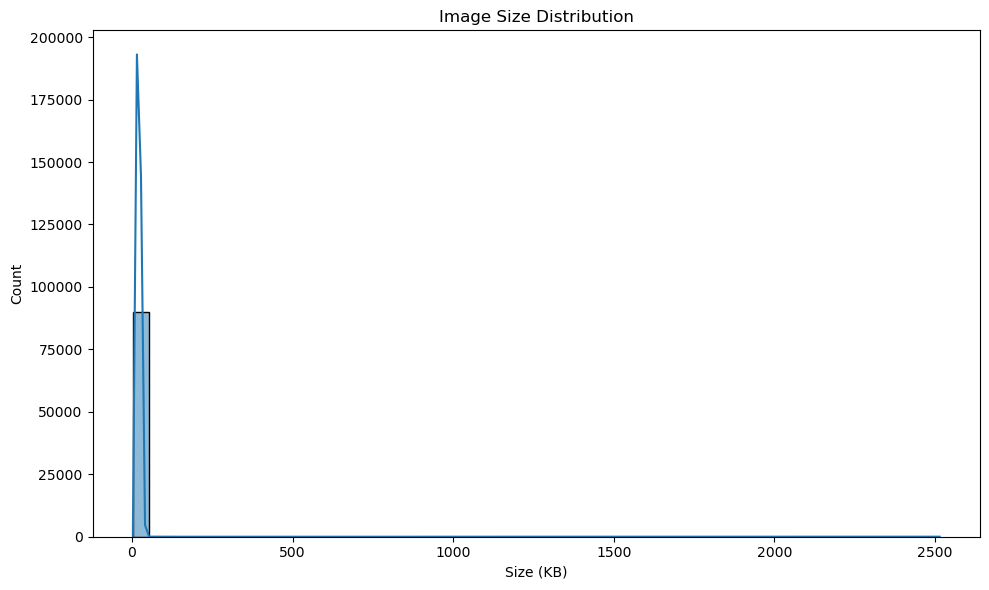

In [47]:
# Image size analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['size'] / 1024, bins=50, kde=True)  # Convert to KB
plt.title('Image Size Distribution')
plt.xlabel('Size (KB)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

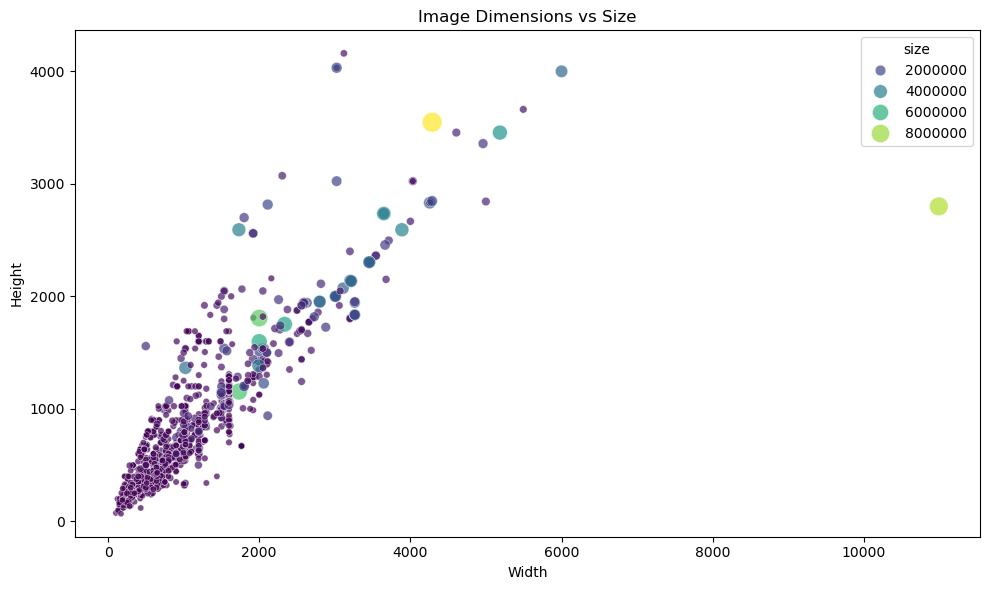

In [25]:
# Correlation between image dimensions and size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='width', y='height', hue='size', data=df, palette='viridis', size='size', sizes=(20, 200), alpha=0.7)
plt.title('Image Dimensions vs Size')
plt.xlabel('Width')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

In [48]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              width        height          size
count  89885.000000  89885.000000  8.988500e+04
mean     224.294276    224.329132  2.258133e+04
std       25.794144     24.296881  1.272733e+04
min       45.000000     83.000000  2.909000e+03
25%      224.000000    224.000000  1.846100e+04
50%      224.000000    224.000000  2.184900e+04
75%      224.000000    224.000000  2.594300e+04
max     4763.000000   3421.000000  2.575172e+06


In [49]:
# Check for potential outliers or unusual images
print("\nPotential outliers (images with dimensions > 2 standard deviations from mean):")
mean_width, std_width = df['width'].mean(), df['width'].std()
mean_height, std_height = df['height'].mean(), df['height'].std()
outliers = df[(df['width'] > mean_width + 2*std_width) | 
              (df['width'] < mean_width - 2*std_width) |
              (df['height'] > mean_height + 2*std_height) |
              (df['height'] < mean_height - 2*std_height)]
print(outliers[['class', 'filename', 'width', 'height', 'size']])


Potential outliers (images with dimensions > 2 standard deviations from mean):
                   class filename  width  height    size
20109  PLUSH CRESTED JAY  189.jpg     98     153    6488
20110  PLUSH CRESTED JAY  162.jpg     92     225    6609
20111  PLUSH CRESTED JAY  176.jpg    108     138    6141
20112  PLUSH CRESTED JAY  200.jpg    465     269   24486
20113  PLUSH CRESTED JAY  016.jpg    897     575  164311
...                  ...      ...    ...     ...     ...
85269  PLUSH CRESTED JAY    1.jpg    146     135    8642
87885  PLUSH CRESTED JAY    4.jpg    133     185    7592
87886  PLUSH CRESTED JAY    5.jpg     84     140    4454
87888  PLUSH CRESTED JAY    3.jpg    266     330   18521
87889  PLUSH CRESTED JAY    1.jpg    489     283   24892

[198 rows x 5 columns]


In [50]:
# Class-wise image size statistics
class_size_stats = df.groupby('class')['size'].agg(['mean', 'median', 'min', 'max'])
print("\nClass-wise Image Size Statistics (in bytes):")
print(class_size_stats)


Class-wise Image Size Statistics (in bytes):
                                     mean   median    min    max
class                                                           
ABBOTTS BABBLER              19079.497110  17908.0   9557  34610
ABBOTTS BOOBY                20167.342105  20700.5   8040  39370
ABYSSINIAN GROUND HORNBILL   23326.243386  22706.0   8849  43121
AFRICAN CROWNED CRANE        26939.131034  26413.0  12572  39867
AFRICAN EMERALD CUCKOO       22023.390244  21097.0  11408  34289
...                                   ...      ...    ...    ...
YELLOW BELLIED FLOWERPECKER  20155.884146  20093.0   9026  31874
YELLOW BREASTED CHAT         22152.702830  21737.0  14143  35567
YELLOW CACIQUE               21719.036364  21450.0  11222  33667
YELLOW HEADED BLACKBIRD      19051.934911  18863.0  10804  33016
ZEBRA DOVE                   26436.461111  26327.0   6252  43211

[526 rows x 4 columns]


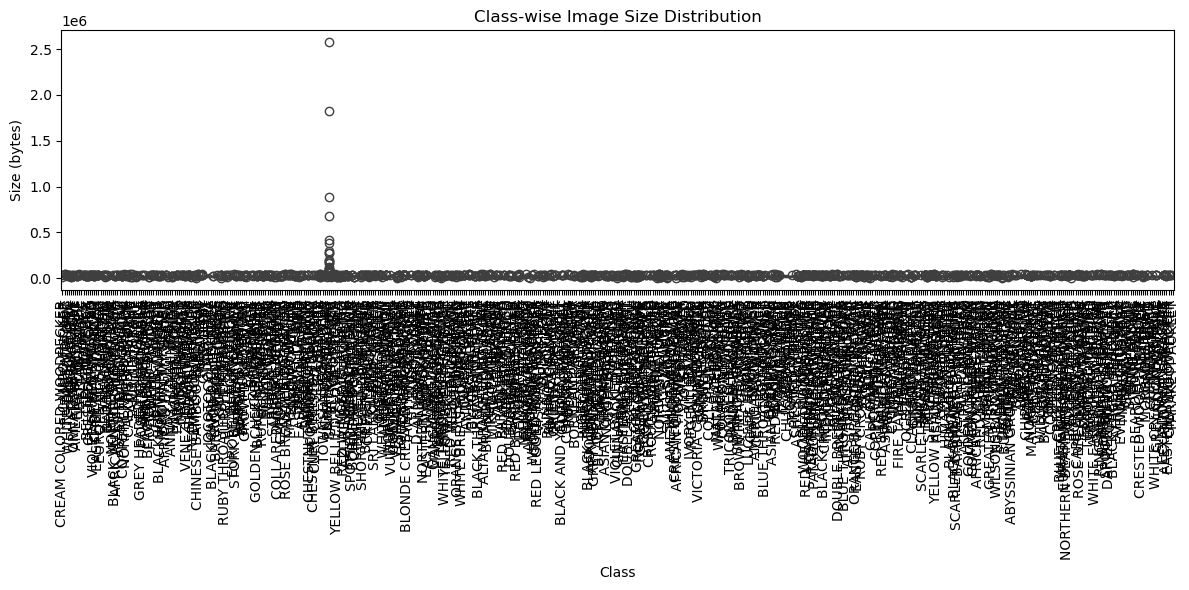

In [51]:
# Visualize class-wise image size distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='size', data=df)
plt.title('Class-wise Image Size Distribution')
plt.xlabel('Class')
plt.ylabel('Size (bytes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()